In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## Define a dataset
mean_01 = np.array([1.0, 0.5])
cov_01 = np.array([[1.0,0.1],[0.1,1.2]])

mean_02 = np.array([5.3,6.5])
cov_02 = np.array([[1.0,0.1],[0.1,1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


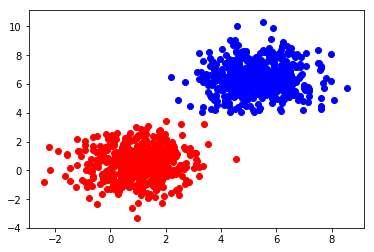

In [6]:
plt.scatter(dist_01[:,0],dist_01[:,1], color='red')
plt.scatter(dist_02[:,0],dist_02[:,1], color='blue')

plt.show()

In [12]:
## Input data :- (dist_01.shape[0]+dist_02.shape[0], #num_features)
data = np.concatenate((dist_01, dist_02))
print data.shape

print data.min(), data.max()

(1000, 2)
-3.27913567143 10.3217378093


In [37]:
## KMeans Clustering -> Parameter Definition
K = 4 ## Number of clusters
clusters = {}
for cx in range(K):
    params = {
        'centroid': np.random.uniform(low=data.min(), high=data.max(),size=(data.shape[1])),
        'history': [], # history of the centroid locations
        'points' : [], # points in the cluster -> for centroid recalculation
    }
    clusters[cx] = params

colors = ['yellow','red','cyan','green']

In [38]:
print len(clusters[0]['history'])

0


In [33]:
clusters[0]['centroid'] = np.array([15,2])

In [16]:
## Defining a Distance function
def distance(p1, p2):
    '''Euclidian Distance'''
    return np.sqrt(((p1-p2)**2).sum())

distance(np.array([0.0,0.0]),np.array([1.0,1.0]))

1.4142135623730951

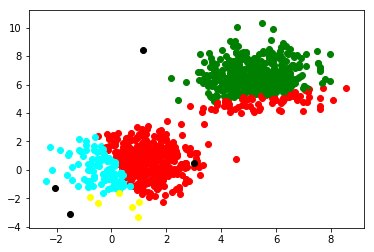

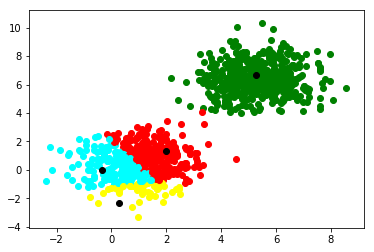

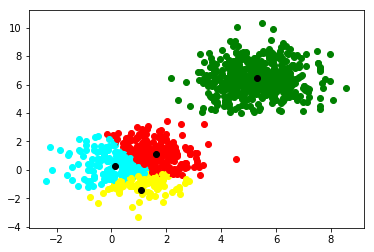

In [39]:
## Execution logic
n_steps = 3
for ix in range(n_steps):
    plt.figure(ix)
    # Step 1. -> Assign points to clusters
    for ix in range(data.shape[0]):
        d = []
        for cx in range(K):
            dist = distance(data[ix], clusters[cx]['centroid'])
            d.append(dist)

        d = np.asarray(d)
        c_id = np.argmin(d) ## Cluster ID for the particular point

        plt.scatter(data[ix,0], data[ix, 1], color=colors[c_id])

        clusters[c_id]['points'].append(data[ix])

    for cx in range(K):
        plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], color='black')

    # Step 2. -> Update the centroid
    for cx in range(K):
        clusters[cx]['history'].append(clusters[cx]['centroid'])

        if len(clusters[cx]['points']) !=0:
            new_val = np.array(clusters[cx]['points']).mean(axis=0)

            clusters[cx]['centroid'] = new_val # updated centroid location


        ## Step 3. Remove points from the cluster
        clusters[cx]['points'] = []   

    plt.show()

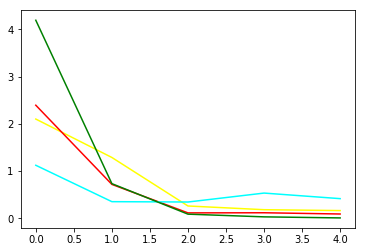

In [32]:
plt.figure(0)
for cx in range(K):
    hist_d = []
    for pt in range(1, len(clusters[cx]['history'])):
        hist_d.append(distance(clusters[cx]['history'][pt], clusters[cx]['history'][pt-1]))
    plt.plot(hist_d, color=colors[cx])
plt.show()

In [23]:
test_matrix = np.ones((10,2))
test_matrix[:,0] = 0.0
print test_matrix.mean()
print test_matrix.mean(axis=0)
print test_matrix.mean(axis=1)

0.5
[ 0.  1.]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]


In [11]:
temp = np.vstack((dist_01, dist_02))
print temp.shape

random_temp = np.hstack((dist_01, dist_02))
print random_temp.shape

(1000, 2)
(500, 4)
